# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to return an datafrme where each column is to a polynomial value up to the total degree  e.g. degree = 3, then column 1 is itself. column 2 is the  squared and column 3 is the  cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

In [40]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
tmp = pd.Series([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print (tmp)
print (tmp_cubed)

0    1.0
1    2.0
2    3.0
dtype: float64
0     1.0
1     8.0
2    27.0
dtype: float64


## Create a polynomial function

In [42]:
def polynomial(feature, degree):
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature

    if degree > 1:
        for power in range(2, degree+1): 
            name = 'power_' + str(power)
            tmp = feature.apply(lambda x: x**power)
            poly_dataframe[name] = tmp

    return poly_dataframe

In [43]:
# test the function:
print (polynomial(tmp, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


## Visualize polynomial regression

In [44]:
sales = pd.read_csv('kc_house_data.csv')

In [45]:
sales.sort_values(['sqft_living', 'price'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [46]:
poly1_data = polynomial(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target
poly1_data

,power_1,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


### First degree polynomial regression

In [47]:
lm = linear_model.LinearRegression()
model1 = lm.fit(poly1_data['power_1'].values.reshape(-1,1), poly1_data['price'])
print(model1.coef_, model1.intercept_)

[280.6235679] -43580.74309447361


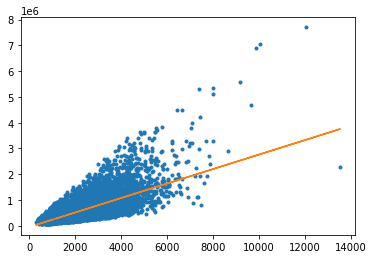

In [48]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data['power_1'].values.reshape(-1,1)),'-')
#plt.plot(poly1_data['power_1'],poly1_data['price'],'.')
#plt.plot(poly1_data['power_1'], model1.predict(poly1_data['power_1'].values.reshape(-1,1)),'-')

### Second degree polynomial regression

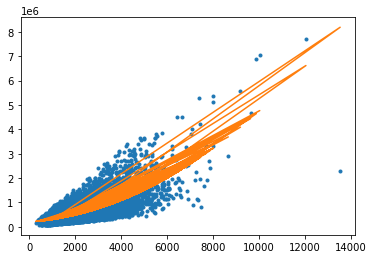

In [53]:
poly2_data = polynomial(sales['sqft_living'], 2)
features = poly2_data.columns
poly2_data['price'] = sales['price']

model = linear_model.LinearRegression()
model.fit(poly2_data[features], poly2_data['price'])

plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model.predict(poly2_data[features]),'-')
plt.show()

In [35]:
lm = linear_model.LinearRegression()
model2 = lm.fit(poly2_data[features], poly2_data['price'])
print(model2.coef_, model2.intercept_)

[6.79940947e+01 3.85812609e-02] 199222.2793054852


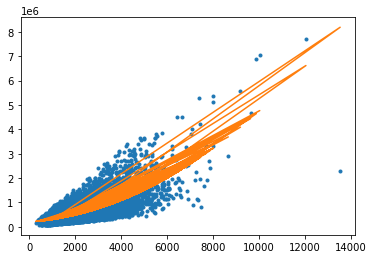

In [36]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data[features]),'-')
plt.show()
#plt.plot(poly2_data['power_1'],poly2_data['price'],'.')
#plt.plot(poly2_data['power_1'], model2.predict(poly2_data[features]), ',', color = 'red', alpha = 1)

### 15th degree polynomial regression

In [37]:
poly15_data = polynomial(sales['sqft_living'], 15)
features = poly15_data.columns
poly15_data['price'] = sales['price']

poly15_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,1180,1392400,1643032000,1938777760000,2287757756800000,2699554153024000000,3185473900568320000000,3758859202670617600000000,4435453859151328768000000000,5233835553798567946240000000000,6175925953482310176563200000000000,7287592625109126008344576000000000000,8599359297628768689846599680000000000000,10147243971201947054018987622400000000000000,11973747886018297523742405394432000000000000000,221900.0
1,2570,6604900,16974593000,43624704010000,112115489305700000,288136807515649000000,740511595315217930000000,1903114799960110080100000000,4891005035897482905857000000000,12569882942256531068052490000000000,32304599161599284844894899300000000000,83022819845310162051379891201000000000000,213368647002447116472046320386570000000000000,548357422796289089333159043393484900000000000000,1409278576586462959586218741521256193000000000...,538000.0
2,770,592900,456533000,351530410000,270678415700000,208422380089000000,160485232668530000000,123573629154768100000000,95151694449171437000000000,73266804725862006490000000000,56415439638913744997300000000000,43439888521963583647921000000000000,33448714161911959408899170000000000000,25755509904672208744852360900000000000000,19831742626597600733536317893000000000000000,180000.0
3,1960,3841600,7529536000,14757890560000,28925465497600000,56693912375296000000,111120068255580160000000,217795333780937113600000000,426878854210636742656000000000,836682554252848015605760000000000,1639897806335582110587289600000000000,3214199700417740936751087616000000000000,6299831412818772236032131727360000000000000,12347669569124793582622978185625600000000000000,2420143235548459542194103724382617600000000000...,604000.0
4,1680,2822400,4741632000,7965941760000,13382782156800000,22483074023424000000,37771564359352320000000,63456228123711897600000000,106606463247835987968000000000,179098858256364459786240000000000,300886081870692292440883200000000000,505488617542763051300683776000000000000,849220877471841926185148743680000000000000,1426691074152694435991049889382400000000000000,2396841004576526652464963814162432000000000000000,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,2340900,3581577000,5479812810000,8384113599300000,12827693806929000000,19626371524601370000000,30028348432640096100000000,45943373101939347033000000000,70293360845967200960490000000000,107548842094329817469549700000000000,164549728404324620728411041000000000000,251761084458616669714468892730000000000000,385194459221683504663137405876900000000000000,589347522609175762134600230991657000000000000000,360000.0
21609,2310,5336100,12326391000,28473963210000,65774855015100000,151939915084881000000,350981203846075110000000,810766580884433504100000000,1872870801843041394471000000000,4326331552257425621228010000000000,9993825885714653185036703100000000000,23085737796000848857434784161000000000000,53328054308761960860674351411910000000000000,123187805453240129588157751761512100000000000000,2845638305969846993486444065690929510000000000...,400000.0
21610,1020,1040400,1061208000,1082432160000,1104080803200000,1126162419264000000,1148685667649280000000,1171659381002265600000000,1195092568622310912000000000,1218994419994757130240000000000,1243374308394652272844800000000000,1268241794562545318301696000000000000,1293606630453796224667729920000000000000,1319478763062872149161084518400000000000000,1345868338324129592144306208768000000000000000,402101.0
21611,1600,2560000,4096000000,6553600000000,10485760000000000,16777216000000000000,26843545600000000000000,42949672960000000000000000,68719476736000000000000000000,109951162777600000000000000000000,175921860444160000000000000000000000,281474976710656000000000000000000000000,450359962737049600000000000000000000000000,720575940379279360000000000000000000000000000,1152921504606846976000000000000000000000000000000,400000.0


In [38]:
lm = linear_model.LinearRegression()
model15 = lm.fit(poly15_data[features], poly15_data['price'])
print(model15.coef_, model15.intercept_)

[ 4.56404164e-91  6.91713546e-51  2.57715436e-56  2.78197887e-88
  1.19863929e-74  2.68575522e-71  2.26147568e-67  1.85900299e-63
  1.47144116e-59  1.09771012e-55  7.43509038e-52  4.23015578e-48
  1.61618577e-44 -2.49283826e-48  9.59718336e-53] 537116.3296377116


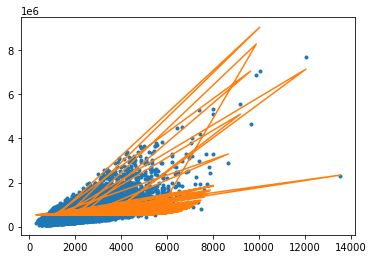

In [39]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data[features]),'-')
#plt.plot(poly15_data['power_1'],poly15_data['price'],'.')
#plt.plot(poly15_data['power_1'], model15.predict(poly15_data[features]), ',', color = 'red')

## Changing the data and re-learning

In [99]:
sales_set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
sales_set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
sales_set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
sales_set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

[ 3.05794168e-90 -1.69394968e-49  2.35919957e-55  1.21888065e-88
  3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
  4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
  3.62176959e-44 -5.63501661e-48  2.18641116e-52] 539058.8186680083


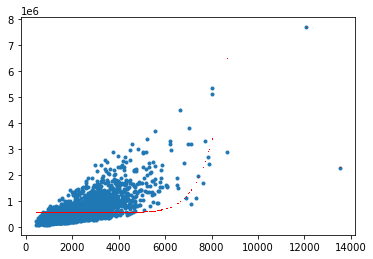

In [101]:
poly15_data = polynomial(sales_set_1['sqft_living'], 15)
features = poly15_data.columns
poly15_data['price'] = sales_set_1['price']

lm = linear_model.LinearRegression()
model15 = lm.fit(poly15_data[features], poly15_data['price'])
print(model15.coef_, model15.intercept_)

plt.plot(poly15_data['power_1'],poly15_data['price'],'.')
plt.plot(poly15_data['power_1'], model15.predict(poly15_data[features]), ',', color = 'red', alpha = 1)

## Selecting a Polynomial Degree

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for turicreate.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [105]:
sales_train = pd.read_csv('wk3_kc_house_train_data.csv')
sales_valid = pd.read_csv('wk3_kc_house_valid_data.csv')
sales_test = pd.read_csv('wk3_kc_house_test_data.csv')

In [116]:
RSS_result = []
for degree in range(1,16):
    train_data = polynomial(sales_train['sqft_living'], degree)
    valid_data = polynomial(sales_valid['sqft_living'], degree)
    features = train_data.columns
    train_data['price'] = sales_train['price']
    lm = linear_model.LinearRegression() 
    train_model = lm.fit(train_data[features], train_data['price'])
    predictions = train_model.predict(valid_data[features])
    RSS = np.sum((sales_valid['price'] - predictions)**2)
    RSS_result.append(RSS)
    print('RSS of degree', str(degree), 'model is:', RSS)

RSS of degree 1 model is: 629097886299585.8
RSS of degree 2 model is: 623955062706518.2
RSS of degree 3 model is: 625820280251530.0
RSS of degree 4 model is: 629987341468521.9
RSS of degree 5 model is: 628238459167681.5
RSS of degree 6 model is: 566268554024498.0
RSS of degree 7 model is: 1073845959574572.4
RSS of degree 8 model is: 7087941765737556.0
RSS of degree 9 model is: 4.530382966260545e+16
RSS of degree 10 model is: 2.4736396046153786e+17
RSS of degree 11 model is: 1.1940718484960005e+18
RSS of degree 12 model is: 5.208327987679527e+18
RSS of degree 13 model is: 7.616230021275084e+17
RSS of degree 14 model is: 2.2975609250104164e+18
RSS of degree 15 model is: 6.955038097283169e+18


In [131]:
RSS_all = pd.DataFrame({'degree': range(1,16), 'RSS': RSS_result})
RSS_all[RSS_all['RSS'] == RSS_all['RSS'].min()]['degree']

5    6
Name: degree, dtype: int64


### Compute RSS on test data using the selected model

In [136]:
test_data = polynomial(sales_test['sqft_living'], 6)
train_data = polynomial(sales_train['sqft_living'], 6)

features = train_data.columns # get the name of the features
train_data['price'] = sales_train['price'] # add price to the data since it's the target
lm = linear_model.LinearRegression() 
train_model = lm.fit(train_data[features], train_data['price'])

predictions = train_model.predict(test_data[features])
RSS_test = np.sum((sales_test['price'] - predictions)**2)
print('RSS of test data is:', '{0:.3f}'.format(RSS_test))

RSS of test data is: 135225113024663.828
